In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, randrange, seed
from vpython import rate
import matplotlib.animation as animation


<IPython.core.display.Javascript object>

TypeError: argument must be a sequence

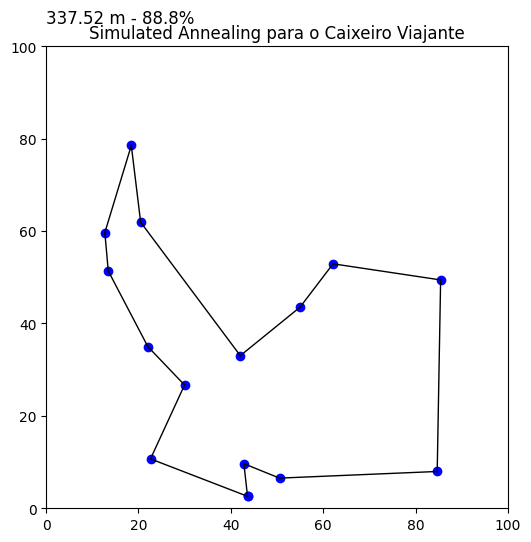

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import randrange, random

# --- Configurações iniciais ---
N = 15
L = 100

np.random.seed(2)  # Reprodutibilidade
cidades = np.random.rand(N, 2) * 100  # Coordenadas entre 0 e 100

# --- Criar vetor cidades_SA com retorno ao início ---
cidades_SA = np.zeros((N+1, 2))
cidades_SA[:N] = cidades
cidades_SA[N] = cidades[0]

# --- Funções auxiliares ---
def mag(x):
    return np.sqrt(x[0]**2 + x[1]**2)

def distance(r):
    s = 0.0
    for i in range(N):
        dist = r[i+1] - r[i]
        s += mag(dist)
    return s

# --- Simulated Annealing ---
def evoluir(cidades_inicial, N, L, Tmin, tau):
    Tmax = 10.0

    t = 0
    T = Tmax
    cidades = cidades_inicial.copy()
    quadros = [cidades.copy()]
    distancias = [distance(cidades)]
    
    D = distancias[0]
    
    while T > Tmin:
        t += 1
        T = Tmax * np.exp(-t / tau)

        c1, c2 = randrange(1, N), randrange(1, N)  # Não troca o ponto 0 (para manter o caminho fechado)
        cidades[[c1, c2]] = cidades[[c2, c1]]
        Dnew = distance(cidades)
        dDist = Dnew - D

        if random() < np.exp(-dDist / T):
            D = Dnew
            quadros.append(cidades.copy())
        else:
            cidades[[c1, c2]] = cidades[[c2, c1]]  # desfaz troca se não aceito

        distancias.append(D)
    
    return cidades, quadros, distancias

# --- Evoluir solução ---
cidades_SA, quadros, distancias = evoluir(cidades_SA, N, L, Tmin=1, tau=1e4)

# --- Preparar animação ---
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_aspect('equal')
ax.set_title('Simulated Annealing para o Caixeiro Viajante')

# Pontos das cidades
cidades_plot, = ax.plot([], [], 'bo')

# Linhas conectando as cidades
linhas = [ax.plot([], [], '-', color='k', lw=1)[0] for _ in range(N)]

# Texto de legenda
legenda = ax.text(0, L+5, '', fontsize=12, color='black')

def init():
    r = quadros[0]
    cidades_plot.set_data(r[:,0], r[:,1])
    for i in range(N):
        x1, y1 = r[i, 0], r[i, 1]
        x2, y2 = r[(i+1)%N, 0], r[(i+1)%N, 1]
        linhas[i].set_data([x1, x2], [y1, y2])
    
    legenda.set_text(f'{distancias[0]:.2f} m - 0%')
    return linhas + [cidades_plot, legenda]

def animate(i):
    r = quadros[i]
    cidades_plot.set_data(r[:,0], r[:,1])
    for j in range(N):
        x1, y1 = r[j, 0], r[j, 1]
        x2, y2 = r[(j+1)%N, 0], r[(j+1)%N, 1]
        linhas[j].set_data([x1, x2], [y1, y2])

    progresso = (i / len(quadros)) * 100
    legenda.set_text(f'{distancias[i]:.2f} m - {progresso:.1f}%')
    return linhas + [cidades_plot, legenda]

ani = animation.FuncAnimation(
    fig, animate, frames=np.arange(1, len(quadros)),
    init_func=init, interval=50, blit=True
)

# --- Salvar animação ---
ani.save('simulated_annealing.gif', writer='pillow', dpi=80)

plt.show()
